In [1]:
import ROOT,glob,math,os
from array import array

Welcome to JupyROOT 6.18/00


In [2]:
h1=ROOT.TH1F("dimuon_mass","dimuon_mass",200,0,10)
h2=ROOT.TH1F("dielectron_mass","dielectron_mass",200,0,10)
hm1=ROOT.TH1F("muon_1_eta","muon_1_eta",200,-10,10)
hm2=ROOT.TH1F("muon_2_eta","muon_2_eta",200,-10,10)
he1=ROOT.TH1F("electron_1_eta","electron_1_eta",200,-10,10)
he2=ROOT.TH1F("electron_2_eta","electron_2_eta",200,-10,10)

In [3]:
#e:11 muon:13
path="ntuple.root"
f=ROOT.TFile(path,"r")
t=f.Get("tau")
N=t.GetEntries()
for i in range(N):
    t.GetEntry(i)
    if abs(t.mc_pdgId[3])==13:
        m1=ROOT.TLorentzVector()
        e1=ROOT.TLorentzVector()
        m1.SetPtEtaPhiM(t.mc_pt[3],t.mc_eta[3],t.mc_phi[3],t.mc_m[3])
        e1.SetPtEtaPhiM(t.mc_pt[5],t.mc_eta[5],t.mc_phi[5],t.mc_m[5])
        m2=ROOT.TLorentzVector()
        e2=ROOT.TLorentzVector()
        m2.SetPtEtaPhiM(t.mc_pt[4],t.mc_eta[4],t.mc_phi[4],t.mc_m[4])
        e2.SetPtEtaPhiM(t.mc_pt[6],t.mc_eta[6],t.mc_phi[6],t.mc_m[6])

        dim=ROOT.TLorentzVector()
        die=ROOT.TLorentzVector()
        dim=m1+m2
        die=e1+e2
        
        mpt=sorted([[t.mc_pt[3],t.mc_eta[3]],[t.mc_pt[4],t.mc_eta[4]]])
        hm1.Fill(mpt[1][1])
        hm2.Fill(mpt[0][1])
        ept=sorted([[t.mc_pt[5],t.mc_eta[5]],[t.mc_pt[6],t.mc_eta[6]]])
        he1.Fill(ept[1][1])
        he2.Fill(ept[0][1])
        h1.Fill(dim.M()/1000.0)
        h2.Fill(die.M()/1000.0)
        #print(dim.M(),die.M(),t.mc_m[1],t.mc_m[2])
    else:
        m1=ROOT.TLorentzVector()
        e1=ROOT.TLorentzVector()
        e1.SetPtEtaPhiM(t.mc_pt[3],t.mc_eta[3],t.mc_phi[3],t.mc_m[3])
        m1.SetPtEtaPhiM(t.mc_pt[5],t.mc_eta[5],t.mc_phi[5],t.mc_m[5])
        m2=ROOT.TLorentzVector()
        e2=ROOT.TLorentzVector()
        e2.SetPtEtaPhiM(t.mc_pt[4],t.mc_eta[4],t.mc_phi[4],t.mc_m[4])
        m2.SetPtEtaPhiM(t.mc_pt[6],t.mc_eta[6],t.mc_phi[6],t.mc_m[6])

        dim=ROOT.TLorentzVector()
        die=ROOT.TLorentzVector()
        dim=m1+m2
        die=e1+e2

        mpt=sorted([[t.mc_pt[5],t.mc_eta[5]],[t.mc_pt[6],t.mc_eta[6]]])
        hm1.Fill(mpt[1][1])
        hm2.Fill(mpt[0][1])
        ept=sorted([[t.mc_pt[3],t.mc_eta[3]],[t.mc_pt[4],t.mc_eta[4]]])
        he1.Fill(ept[1][1])
        he2.Fill(ept[0][1])
        h1.Fill(dim.M()/1000.0)
        h2.Fill(die.M()/1000.0)
        #print(dim.M(),die.M(),t.mc_m[1],t.mc_m[2])

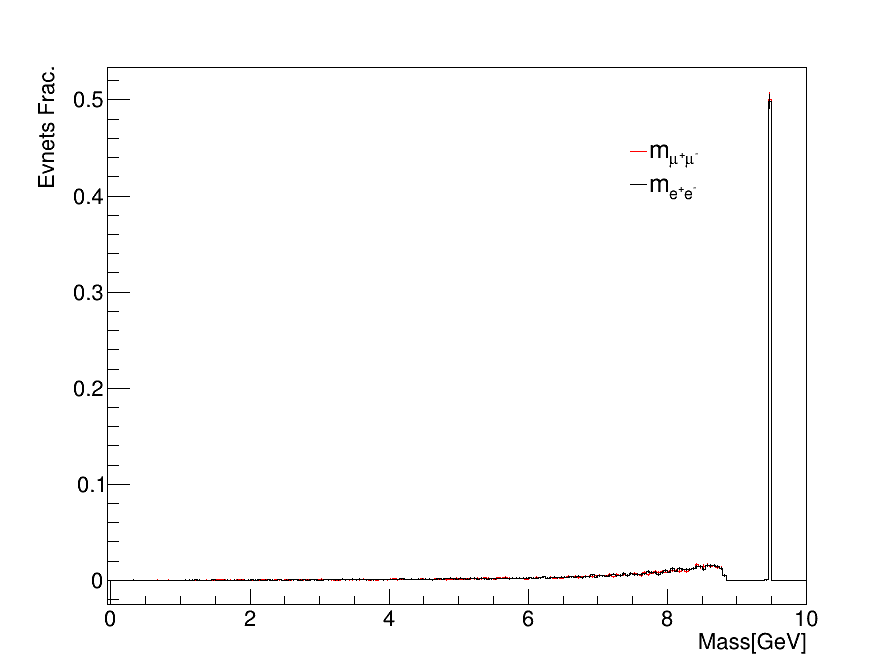

In [4]:
rebin=1
h1.Rebin(rebin)
h2.Rebin(rebin)
h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())
h1.GetXaxis().SetRangeUser(-10,10)
#h1.GetYaxis().SetRangeUser(0,0.4)
h1.SetNameTitle("","")
h1.GetXaxis().SetTitle("Mass[GeV]")
h1.GetYaxis().SetTitle("Evnets Frac.")
h1.SetLineColor(2)
h2.SetLineColor(1)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
c1.SetLeftMargin(0.12)
#print(c1.GetLeftMargin())
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
t=ROOT.TLegend(0.7,0.7,0.8,0.8)
t.AddEntry(h1,"m_{#mu^{+}#mu^{-}}","l")
t.AddEntry(h2,"m_{e^{+}e^{-}}","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
c1.Draw()
name="Mass"
#c1.SaveAs("figures/"+name+".jpg")
#c1.SaveAs("figures/"+name+".pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures/Eta.jpg has been created
Info in <TCanvas::Print>: pdf file figures/Eta.pdf has been created


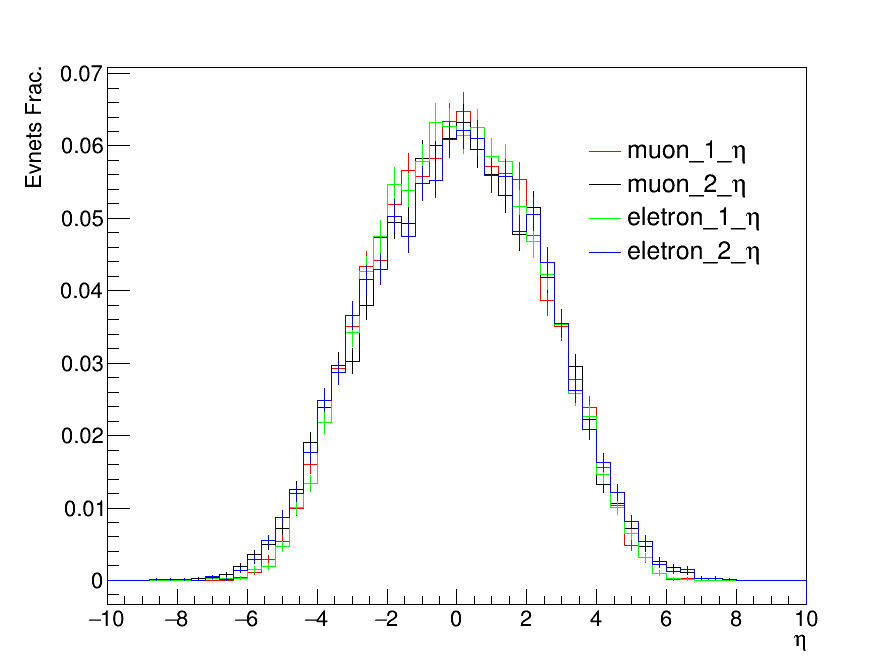

In [6]:
rebin=1
hm1.Rebin(rebin)
hm2.Rebin(rebin)
he1.Rebin(rebin)
he2.Rebin(rebin)
hm1.Scale(1/hm1.Integral())
hm2.Scale(1/hm2.Integral())
he1.Scale(1/he1.Integral())
he2.Scale(1/he2.Integral())
hm1.GetXaxis().SetRangeUser(-10,10)
#hm1.GetYaxis().SetRangeUser(0,0.5)
hm1.SetNameTitle("","")
hm1.GetXaxis().SetTitle("#eta")
hm1.GetYaxis().SetTitle("Evnets Frac.")
hm1.SetLineColor(2)
hm2.SetLineColor(1)
he1.SetLineColor(3)
he2.SetLineColor(4)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
c1.SetLeftMargin(0.12)
#print(c1.GetLeftMargin())
ROOT.gStyle.SetOptStat(0)
hm1.Draw("hist e")
hm2.Draw("same hist e")
he1.Draw("same hist e")
he2.Draw("same hist e")
t=ROOT.TLegend(0.65,0.6,0.85,0.8)
t.AddEntry(hm1,"muon_1_#eta","l")
t.AddEntry(hm2,"muon_2_#eta","lp")
t.AddEntry(he1,"eletron_1_#eta","l")
t.AddEntry(he2,"eletron_2_#eta","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
c1.Draw()
name="Eta"
c1.SaveAs("figures/"+name+".jpg")
c1.SaveAs("figures/"+name+".pdf")